In [55]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [35]:
paths = []
for filename in glob.glob('D:\MachineLearningProblems\SalesPrediction\Dataset\*'):
    paths.append(filename)

In [36]:
df_hosp_prof = pd.read_csv(paths[0])
df_hosp_rev = pd.read_csv(paths[1])
df_proj_rev = pd.read_csv(paths[2])

df_proj_rev.head()
 

,Hospital_ID,District_ID,Instrument_ID,Annual_Projected_Revenue
0,Hospital 1,District 13,Instrument 2,17164
1,Hospital 1,District 13,Instrument 3,655645
2,Hospital 1,District 13,Instrument 4,281452
3,Hospital 1,District 2,Instrument 2,12199
4,Hospital 1,District 20,Instrument 2,178128


In [37]:
print(f'{df_hosp_prof.info()}\n\n{df_hosp_rev.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27865 entries, 0 to 27864
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Hospital_ID         27865 non-null  object
 1   District_ID         27865 non-null  object
 2   Hospital_employees  27865 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 653.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hospital_ID    44353 non-null  object
 1   Region_ID      44353 non-null  object
 2   District_ID    44353 non-null  object
 3   Instrument_ID  44353 non-null  object
 4   Month 1        44353 non-null  int64 
 5   Month 2        44353 non-null  int64 
 6   Month 3        44353 non-null  int64 
 7   Month 4        44353 non-null  int64 
 8   Month 5        44353 non-null  int64 
 9   Month 6      

In [38]:
new_df =  df_hosp_rev.merge(df_hosp_prof, on=['Hospital_ID','District_ID'], how='left')
print(new_df.info(), '\n')
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49433 entries, 0 to 49432
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hospital_ID         49433 non-null  object 
 1   Region_ID           49433 non-null  object 
 2   District_ID         49433 non-null  object 
 3   Instrument_ID       49433 non-null  object 
 4   Month 1             49433 non-null  int64  
 5   Month 2             49433 non-null  int64  
 6   Month 3             49433 non-null  int64  
 7   Month 4             49433 non-null  int64  
 8   Month 5             49433 non-null  int64  
 9   Month 6             49433 non-null  int64  
 10  Month 7             49433 non-null  int64  
 11  Month 8             49433 non-null  int64  
 12  Month 9             49433 non-null  int64  
 13  Month 10            49433 non-null  int64  
 14  Month 11            49433 non-null  int64  
 15  Month 12            49433 non-null  int64  
 16  Year

,Hospital_ID,Region_ID,District_ID,Instrument_ID,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Year Total,Hospital_employees
0,Hospital 1,Region 1,District 12,Instrument 2,8534,9917,7825,11702,8776,7755,9289,7796,7595,8292,7787,8282,103550,3.0
1,Hospital 1,Region 1,District 12,Instrument 3,298,298,214,311,261,223,237,171,173,183,193,0,2562,3.0
2,Hospital 1,Region 1,District 13,Instrument 1,37,40,38,43,29,0,0,0,0,0,0,0,187,6.0
3,Hospital 1,Region 1,District 13,Instrument 2,2486,3332,3193,2556,2108,2757,2639,2531,2771,2682,12317,1369,40741,6.0
4,Hospital 1,Region 1,District 13,Instrument 3,857,892,739,759,736,415,1203,434,448,113,829,1124,8549,6.0


In [39]:
def column_conv(col):
    return pd.Series([int(val.split()[1]) if len(val.split())<=2 else 0 for val in col])

def operation(new_df):
    for i in new_df.columns:
        if new_df[i].dtypes == object:
            new_df[i] = column_conv(new_df[i])
        elif new_df[i].dtypes == np.float64:
            new_df[i] = new_df[i].fillna(0.0).astype(int)
    return new_df

In [40]:
new_df = operation(new_df)
new_df.head()

,Hospital_ID,Region_ID,District_ID,Instrument_ID,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Year Total,Hospital_employees
0,1,1,12,2,8534,9917,7825,11702,8776,7755,9289,7796,7595,8292,7787,8282,103550,3
1,1,1,12,3,298,298,214,311,261,223,237,171,173,183,193,0,2562,3
2,1,1,13,1,37,40,38,43,29,0,0,0,0,0,0,0,187,6
3,1,1,13,2,2486,3332,3193,2556,2108,2757,2639,2531,2771,2682,12317,1369,40741,6
4,1,1,13,3,857,892,739,759,736,415,1203,434,448,113,829,1124,8549,6


count    4.943300e+04
mean     3.509036e+04
std      2.183317e+05
min     -2.040193e+06
25%      2.650000e+02
50%      2.015000e+03
75%      1.268100e+04
max      1.546145e+07
Name: Year Total, dtype: float64


C:\Users\jubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Year Total'), Text(0, 0.5, 'P(Year Total)')]

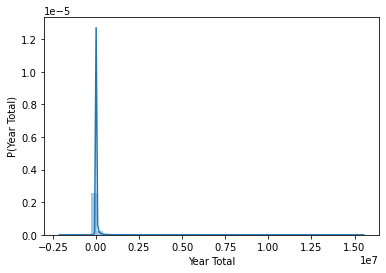

In [41]:
#new_df.to_csv('new_df.csv')

print(new_df['Year Total'].describe())
sns.distplot(a=new_df['Year Total'], kde=True).set(xlabel='Year Total', ylabel='P(Year Total)')

In [42]:
# EDA
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(new_df['Year Total']))
threshold = 3
 
# Position of the outlier
out = np.where(z > 3)
out[0].shape[0]

380

In [43]:
df_proj_rev = operation(df_proj_rev)
print(df_proj_rev.info())
df_proj_rev.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11410 entries, 0 to 11409
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Hospital_ID               11410 non-null  int64
 1   District_ID               11410 non-null  int64
 2   Instrument_ID             11410 non-null  int64
 3   Annual_Projected_Revenue  11410 non-null  int64
dtypes: int64(4)
memory usage: 356.7 KB
None


,Hospital_ID,District_ID,Instrument_ID,Annual_Projected_Revenue
0,1,13,2,17164
1,1,13,3,655645
2,1,13,4,281452
3,1,2,2,12199
4,1,20,2,178128


In [44]:
final_df =  new_df.merge(df_proj_rev, on=['Hospital_ID','District_ID', 'Instrument_ID'], how='outer')

In [45]:
print(final_df.info())
final_df.head(50)
final_df.to_csv('final_df.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52612 entries, 0 to 52611
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hospital_ID               52612 non-null  int64  
 1   Region_ID                 49433 non-null  float64
 2   District_ID               52612 non-null  int64  
 3   Instrument_ID             52612 non-null  int64  
 4   Month 1                   49433 non-null  float64
 5   Month 2                   49433 non-null  float64
 6   Month 3                   49433 non-null  float64
 7   Month 4                   49433 non-null  float64
 8   Month 5                   49433 non-null  float64
 9   Month 6                   49433 non-null  float64
 10  Month 7                   49433 non-null  float64
 11  Month 8                   49433 non-null  float64
 12  Month 9                   49433 non-null  float64
 13  Month 10                  49433 non-null  float64
 14  Month 

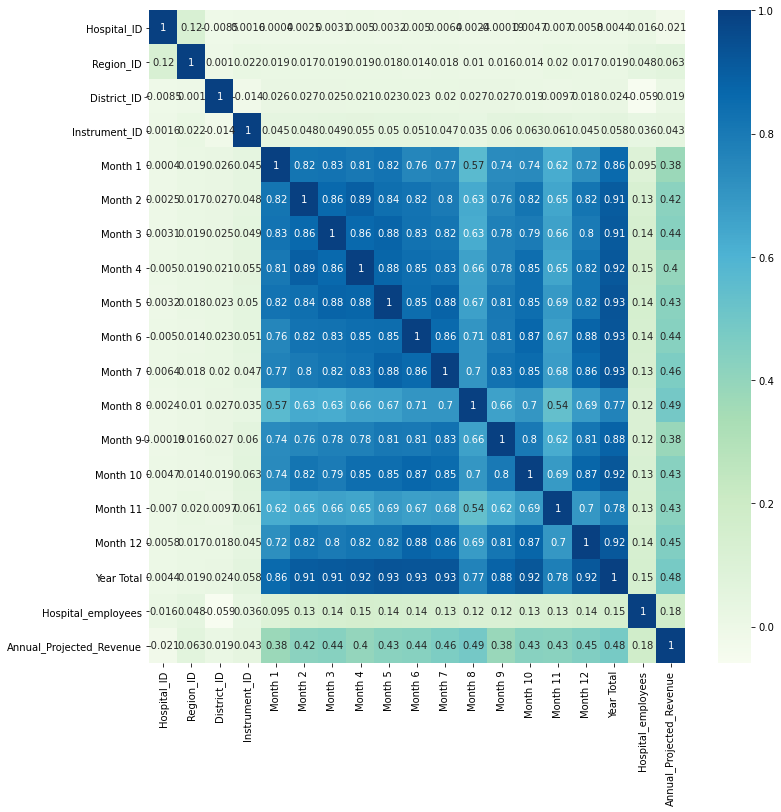

In [15]:
#Calculating Correlation
correlation=final_df.corr()

#Plotting correlation
plt.figure(figsize=(12,12))
corr_heatmap=sns.heatmap(correlation,annot=True,cmap="GnBu")

In [46]:
# As Region_ID has negligible significance with both revenues and projected revenue, and also does not require in solution csv file. 
# Therefore, I have decided to drop it.

final_df.drop(['Region_ID'], axis= 1, inplace = True)
final_df.rename(columns = {'Year Total': 'Actual_Revenue', 'Annual_Projected_Revenue': 'Projected_Revenue'},inplace = True)
final_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 52612 entries, 0 to 52611
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hospital_ID         52612 non-null  int64  
 1   District_ID         52612 non-null  int64  
 2   Instrument_ID       52612 non-null  int64  
 3   Month 1             49433 non-null  float64
 4   Month 2             49433 non-null  float64
 5   Month 3             49433 non-null  float64
 6   Month 4             49433 non-null  float64
 7   Month 5             49433 non-null  float64
 8   Month 6             49433 non-null  float64
 9   Month 7             49433 non-null  float64
 10  Month 8             49433 non-null  float64
 11  Month 9             49433 non-null  float64
 12  Month 10            49433 non-null  float64
 13  Month 11            49433 non-null  float64
 14  Month 12            49433 non-null  float64
 15  Actual_Revenue      49433 non-null  float64
 16  Hosp

In [47]:
s= final_df.pop('Actual_Revenue')
final_df = pd.concat([final_df, s], 1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52612 entries, 0 to 52611
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hospital_ID         52612 non-null  int64  
 1   District_ID         52612 non-null  int64  
 2   Instrument_ID       52612 non-null  int64  
 3   Month 1             49433 non-null  float64
 4   Month 2             49433 non-null  float64
 5   Month 3             49433 non-null  float64
 6   Month 4             49433 non-null  float64
 7   Month 5             49433 non-null  float64
 8   Month 6             49433 non-null  float64
 9   Month 7             49433 non-null  float64
 10  Month 8             49433 non-null  float64
 11  Month 9             49433 non-null  float64
 12  Month 10            49433 non-null  float64
 13  Month 11            49433 non-null  float64
 14  Month 12            49433 non-null  float64
 15  Hospital_employees  49433 non-null  float64
 16  Proj

C:\Users\jubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Year Total'), Text(0, 0.5, 'P(Year Total)')]

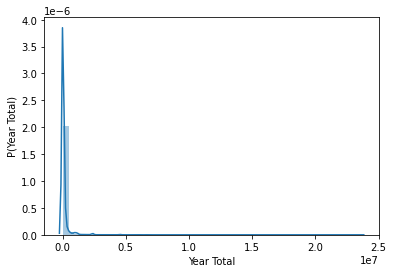

In [48]:
sns.distplot(a=final_df['Projected_Revenue'], kde=True).set(xlabel='Year Total', ylabel='P(Year Total)')

Text(0, 0.5, 'Projected Revenue')

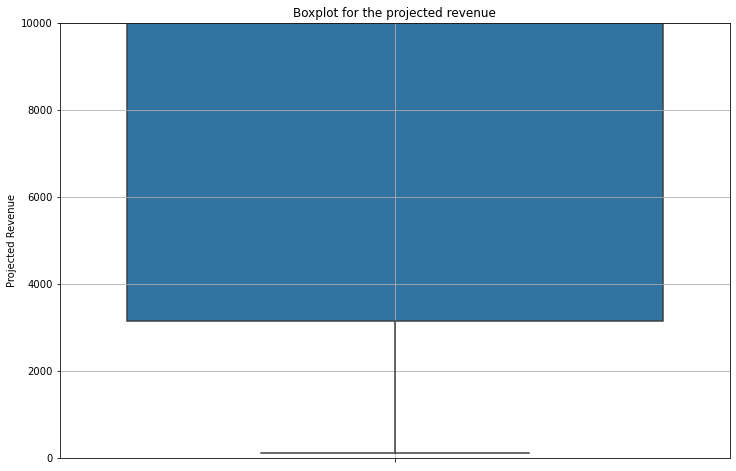

In [19]:
plt.figure(figsize = (12, 8))
sns.boxplot(y=final_df['Projected_Revenue'])
plt.ylim(0, 10000)
plt.grid()
plt.title('Boxplot for the projected revenue')
plt.ylabel('Projected Revenue')

In [20]:
# Print the columns which has nan values
missing_val_count_by_column = (final_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Month 1                3179
Month 2                3179
Month 3                3179
Month 4                3179
Month 5                3179
Month 6                3179
Month 7                3179
Month 8                3179
Month 9                3179
Month 10               3179
Month 11               3179
Month 12               3179
Hospital_employees     3179
Projected_Revenue     40039
Actual_Revenue         3179
dtype: int64


In [58]:
# Imputation
# make copy to avoid changing original data (when Imputing)
new_data = final_df.copy()

'''
cols_with_missing =[col for col in new_data.columns if new_data[col].isnull().any()]
print(cols_with_missing)

for col in cols_with_missing:
    new_data[col +'_was_missing'] = new_data[col].isnull()
'''

my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = final_df.columns

In [82]:
#new_data.to_csv('new_data.csv')
new_data.info()
new_data.drop(new_data[new_data['Actual_Revenue'] < 0].index , inplace =True)
print(new_data.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51481 entries, 0 to 52611
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hospital_ID         51481 non-null  float64
 1   District_ID         51481 non-null  float64
 2   Instrument_ID       51481 non-null  float64
 3   Month 1             51481 non-null  float64
 4   Month 2             51481 non-null  float64
 5   Month 3             51481 non-null  float64
 6   Month 4             51481 non-null  float64
 7   Month 5             51481 non-null  float64
 8   Month 6             51481 non-null  float64
 9   Month 7             51481 non-null  float64
 10  Month 8             51481 non-null  float64
 11  Month 9             51481 non-null  float64
 12  Month 10            51481 non-null  float64
 13  Month 11            51481 non-null  float64
 14  Month 12            51481 non-null  float64
 15  Hospital_employees  51481 non-null  float64
 16  Proj

In [83]:
# Visualizing the data
def Box_plot(df):
    plt.figure(figsize=(10,4))
    plt.title('Box Plot')
    sns.boxplot(df)
    plt.show()

def hist_plot(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Hospital')
    ax.set_ylabel('Revenue')
    plt.title("Scatter Plot")
    plt.show()

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()

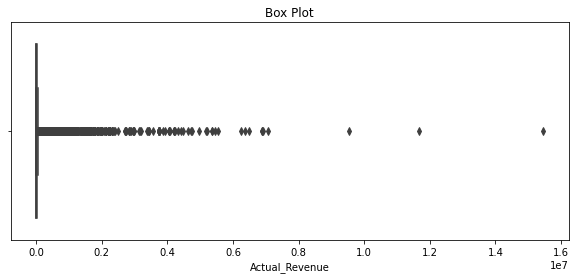

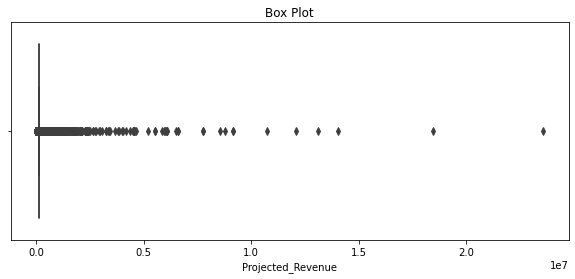

In [88]:
'''
for col in ['Actual_Revenue', 'Projected_Revenue']:
    Box_plot(final_df[col])
    hist_plot(final_df[col])
    dist_plots(final_df[col])
    qq_plots(final_df[col])

'''

Box_plot(new_data['Actual_Revenue'])
Box_plot(new_data['Projected_Revenue'])

In [85]:
# Finding Outliers using IQR

def print_outlier_info(dataset, field):
    a = dataset[field].describe()
    q3 = a['75%']
    q1 = a['25%']
    iqr = q3 - q1 
    print('interquartile range:', iqr)

    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)

    print("upper_inner_fence:", upper_fence)
    print("lower_inner_fence:", lower_fence)

    over_upper = len(dataset[dataset[field] > upper_fence])
    under_lower =  len(dataset[dataset[field] < lower_fence])

    percent = 100 * (over_upper + under_lower) / a['count']
    
    print("percentage of records out of inner fences: %.2f"% (percent))


In [86]:
print_outlier_info(new_data, "Actual_Revenue")

interquartile range: 19393.0
upper_inner_fence: 48840.5
lower_inner_fence: -28731.5
percentage of records out of inner fences: 10.43


In [87]:
print_outlier_info(new_data, "Projected_Revenue")

interquartile range: 0.0
upper_inner_fence: 114266.68153980753
lower_inner_fence: 114266.68153980753
percentage of records out of inner fences: 24.23


# IMPUTATION

Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.

In [91]:
def remove_outlier(dataset, field):
    a = dataset[field].describe()
    q3 = a['75%']
    q1 = a['25%']
    iqr = q3 - q1 
    print('interquartile range:', iqr)

    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)

    print("upper_inner_fence:", upper_fence)
    print("lower_inner_fence:", lower_fence)

    over_upper = len(dataset[dataset[field] > upper_fence])
    under_lower =  len(dataset[dataset[field] < lower_fence])

    percent = 100 * (over_upper + under_lower) / a['count']
    
    print("percentage of records out of inner fences: %.2f"% (percent))
    output_dataset = dataset[dataset[field]<=upper_fence]
    output_dataset = output_dataset[output_dataset[field]>=lower_fence]

    print("length of input dataframe:", len(dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [92]:
new_dataset = remove_outlier(new_data, "Actual_Revenue")

interquartile range: 19393.0
upper_inner_fence: 48840.5
lower_inner_fence: -28731.5
percentage of records out of inner fences: 10.43
length of input dataframe: 51481
length of new dataframe after outlier removal: 46112


In [93]:
new_dataset = remove_outlier(new_dataset, "Projected_Revenue")

interquartile range: 0.0
upper_inner_fence: 114266.68153980753
lower_inner_fence: 114266.68153980753
percentage of records out of inner fences: 21.46
length of input dataframe: 46112
length of new dataframe after outlier removal: 36215


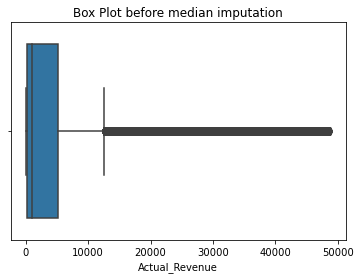

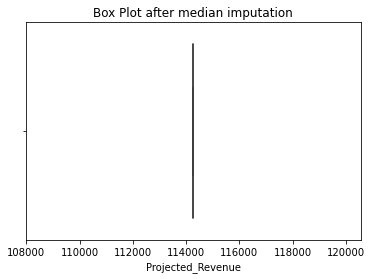

In [94]:
#new_dataset = new_data.copy()

sns.boxplot(new_dataset['Actual_Revenue'])
plt.title("Box Plot before median imputation")
plt.show()

sns.boxplot(new_dataset['Projected_Revenue'])
plt.title("Box Plot after median imputation")
plt.show() 